<a href="https://colab.research.google.com/github/HeshaniNiwanthika/DL_Labsheet2/blob/master/Copy_of_ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural network classification with one hidden layer



You will learn how to:

    Implement a 2-class classification neural network with a single hidden layer
    Use units with a non-linear activation function, such as tanh
    Compute the cross entropy loss
    Implement forward and backward propagation



#### 1 - Packages

Let's first import all the packages that you will need during this assignment.

numpy is the fundamental package for scientific computing with Python.
sklearn provides simple and efficient tools for data mining and data analysis.
matplotlib is a library for plotting graphs in Python.
testCases provides some test examples to assess the correctness of your functions
planar_utils provide various useful functions used in this assignment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
# from testCases import * # Removed the import statement
import sklearn
import sklearn.datasets
import sklearn.linear_model
# from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets # Removed the import statement

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

#### 2 - Dataset

First, let's get the dataset you will work on. The following code will load a "flower" 2-class dataset into variables X and Y.

In [ ]:
X, Y = load_planar_dataset()


Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a model to fit this data.

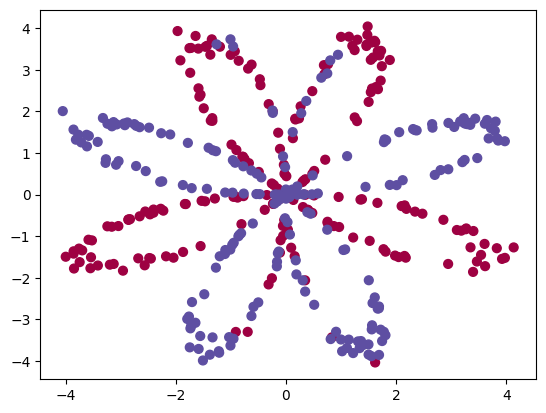

In [ ]:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

You have:

- a numpy-array (matrix) X that contains your features (x1, x2)
- a numpy-array (vector) Y that contains your labels (red:0, blue:1).

Lets first get a better sense of what our data is like.

Exercise: How many training examples do you have? In addition, what is the shape of the variables X and Y?

Hint: How do you get the shape of a numpy array? (help)

In [ ]:

### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


#### Neural Network model


You are going to train a Neural Network with a single hidden layer.

Here is our model:

Mathematically:

For one example $x^{(i)}$:$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$$$y^{(i)}_{prediction} = \begin{cases} 1 &amp; \mbox{if } a^{[2](i)} &gt; 0.5 \\ 0 &amp; \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: $$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large \right) \small \tag{6}$$

Reminder: The general methodology to build a Neural Network is to:

1. Define the neural network structure ( # of input units,  # of hidden units, etc).
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call nn_model(). Once you've built nn_model() and learnt the right parameters, you can make predictions on new data.

4.1 - Defining the neural network structure
Exercise: Define three variables:

- n_x: the size of the input layer
- n_h: the size of the hidden layer (set this to 4)
- n_y: the size of the output layer

Hint: Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [ ]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [ ]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


#### 4.2 - Initialize the model's parameters

Exercise: Implement the function initialize_parameters().

Instructions:

Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
You will initialize the weights matrices with random values.
Use: np.random.randn(a,b) * 0.01 to randomly initialize a matrix of shape (a,b).
You will initialize the bias vectors as zeros.
Use: np.zeros((a,b)) to initialize a matrix of shape (a,b) with zeros.

In [ ]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.

    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###

    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [ ]:

n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


#### 4.3 - The Loop

Question: Implement forward_propagation().

Instructions:

Look above at the mathematical representation of your classifier.
You can use the function sigmoid(). It is built-in (imported) in the notebook.
You can use the function np.tanh(). It is part of the numpy library.
The steps you have to implement are:
Retrieve each parameter from the dictionary "parameters" (which is the output of initialize_parameters()) by using parameters[".."].
Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
Values needed in the backpropagation are stored in "cache". The cache will be given as an input to the backpropagation function.

In [ ]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###

    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###

    assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [ ]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours.
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.01142276543652899 0.011415753585803143 0.00015686931442235628 0.5000392173254455


Now that you have computed $A^{[2]}$ (in the Python variable "A2"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$
Exercise: Implement compute_cost() to compute the value of the cost $J$.

Instructions:

There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented $- \sum\limits_{i=0}^{m} y^{(i)}\log(a^{[2](i)})$:
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
(you can use either np.multiply() and then np.sum() or directly np.dot()).

In [ ]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)

    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2

    Returns:
    cost -- cross-entropy cost given equation (13)
    """

    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs =np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
    cost = - np.sum(logprobs) /m
    ### END CODE HERE ###

    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect.
                                # E.g., turns [[17]] into 17
    assert(isinstance(cost, float))

    return cost

In [ ]:

A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.2797765635793423


Using the cache computed during forward propagation, you can now implement backward propagation.

Question: Implement the function backward_propagation().

Instructions: Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.



Tips:
To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute $g^{[1]'}(Z^{[1]})$ using (1 - np.power(A1, 2)).

In [ ]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.

    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]

    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### END CODE HERE ###

    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    ### END CODE HERE ###

    # Backward propagation: calculate dW1, db1, dW2, db2.
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2 = A2-Y
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1, 2))
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m
    ### END CODE HERE ###

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [ ]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[-0.00907849  0.02253621]
 [ 0.00709666 -0.01761835]
 [-0.00416024  0.01032927]
 [ 0.00586211 -0.01455429]]
db1 = [[-0.00531849]
 [ 0.00415702]
 [-0.00243716]
 [ 0.00343404]]
dW2 = [[-0.00400332  0.00139565 -0.00282214 -0.00408996]]
db2 = [[-0.16670201]]


Question: Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

General gradient descent rule: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

Illustration: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

In [ ]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients

    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###

    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###

    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [ ]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.0159635  -0.00294172]
 [-0.00614729 -0.01127963]
 [ 0.00729632 -0.0253542 ]
 [ 0.01985578 -0.0086511 ]]
b1 = [[ 1.06978270e-04]
 [-4.72882190e-05]
 [-1.30519537e-05]
 [ 1.85593357e-04]]
W2 = [[ 0.03174245 -0.0257996   0.01397534 -0.02003393]]
b2 = [[-0.00016394]]


#### 4.4 - Integrate parts 4.1, 4.2 and 4.3 in nn_model()

Question: Build your neural network model in nn_model().

Instructions: The neural network model has to use the previous functions in the right order.

In [ ]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X,parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)

        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

#### 4.5 Predictions

Question: Use your model to predict by building predict(). Use forward propagation to predict results.

Reminder: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases} 1 & \text{if}\ activation > 0.5 \\ 0 & \text{otherwise} \end{cases}$

As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: X_new = (X > threshold)

In [ ]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2>0.5)
    ### END CODE HERE ###

    return predictions

In [ ]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


It is time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units.

In [ ]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)


Cost after iteration 0: 0.693050
Cost after iteration 1000: 0.295162
Cost after iteration 2000: 0.280195
Cost after iteration 3000: 0.275780
Cost after iteration 4000: 0.272851
Cost after iteration 5000: 0.270639
Cost after iteration 6000: 0.268852
Cost after iteration 7000: 0.267350
Cost after iteration 8000: 0.266053
Cost after iteration 9000: 0.264912


In [ ]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


/tmp/ipython-input-3101546138.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


In [ ]:
# Helper functions from planar_utils.py

import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and add the examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y[0], cmap=plt.cm.Spectral)
    plt.show()

def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((D, m)) # data matrix where each column is a sample
    Y = np.zeros((1, m), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.14,(j+1)*3.14,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
        Y[:,ix] = j

    # Remove the transpose operations that were causing the error
    # X = X.T
    # Y = Y.T

    return X, Y

def load_extra_datasets():
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 1)

    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [ ]:
# Definition for layer_sizes_test_case to resolve NameError

def layer_sizes_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(5, 3)
    Y_assess = np.random.randn(2, 3)
    return X_assess, Y_assess

In [ ]:
# Definition for initialize_parameters_test_case to resolve NameError

def initialize_parameters_test_case():
    n_x, n_h, n_y = 2, 4, 1
    return n_x, n_h, n_y

In [ ]:
# Definition for forward_propagation_test_case to resolve NameError

def forward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    parameters = {'W1': np.array([[ 0.01624345, -0.00611756],
        [-0.00528172, -0.01072969],
        [ 0.00865408, -0.02301539],
        [ 0.01744812, -0.00761207]]),
        'b1': np.array([[ 0.], [ 0.], [ 0.], [ 0.]]),
        'W2': np.array([[ 0.03190391, -0.02493703,  0.01462108, -0.02060122]]),
        'b2': np.array([[ 0.]])}
    return X_assess, parameters

In [ ]:
# Definition for compute_cost_test_case to resolve NameError

def compute_cost_test_case():
    np.random.seed(1)
    Y_assess = np.array([[1, 1, 0]])
    A2_assess = np.array([[0.8, 0.9, 0.4]])
    parameters = {'W1': np.array([[ 0.01624345, -0.00611756],
        [-0.00528172, -0.01072969],
        [ 0.00865408, -0.02301539],
        [ 0.01744812, -0.00761207]]),
        'b1': np.array([[ 0.], [ 0.], [ 0.], [ 0.]]),
        'W2': np.array([[ 0.03190391, -0.02493703,  0.01462108, -0.02060122]]),
        'b2': np.array([[ 0.]])}
    return A2_assess, Y_assess, parameters

In [ ]:
# Definition for backward_propagation_test_case to resolve NameError

def backward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = np.array([[1, 0, 1]])
    parameters = {'W1': np.array([[ 0.01624345, -0.00611756],
        [-0.00528172, -0.01072969],
        [ 0.00865408, -0.02301539],
        [ 0.01744812, -0.00761207]]),
        'b1': np.array([[ 0.], [ 0.], [ 0.], [ 0.]]),
        'W2': np.array([[ 0.03190391, -0.02493703,  0.01462108, -0.02060122]]),
        'b2': np.array([[ 0.]])}
    cache = {'Z1': np.array([[-0.00823112, -0.01731925,  0.01494173],
        [-0.00323603,  0.00270438, -0.00243543],
        [ 0.01245816, -0.01011359, -0.00563333],
        [ 0.01049097, -0.00863148,  0.00542336]]),
        'A1': np.array([[-0.00823069, -0.01731787,  0.01494143],
        [-0.00323603,  0.00270438, -0.00243543],
        [ 0.01245805, -0.01011347, -0.00563326],
        [ 0.01049089, -0.00863139,  0.00542331]]),
        'Z2': np.array([[ 0.0002428,  -0.00090998,  0.0002428 ]]),
        'A2': np.array([[0.5000607, 0.49977258, 0.5000607]])}
    return parameters, cache, X_assess, Y_assess

In [ ]:
# Definition for update_parameters_test_case to resolve NameError

def update_parameters_test_case():
    np.random.seed(1)
    parameters = {'W1': np.array([[ 0.01624345, -0.00611756],
        [-0.00528172, -0.01072969],
        [ 0.00865408, -0.02301539],
        [ 0.01744812, -0.00761207]]),
        'b1': np.array([[ 0.], [ 0.], [ 0.], [ 0.]]),
        'W2': np.array([[ 0.03190391, -0.02493703,  0.01462108, -0.02060122]]),
        'b2': np.array([[ 0.]])}
    grads = {'dW1': np.array([[ 0.00023329, -0.00264653],
        [ 0.00072131,  0.00045828],
        [ 0.00113147,  0.00194901],
        [-0.00200638,  0.00086586]]),
        'db1': np.array([[ -8.91485584e-05], [  3.94068492e-05],
        [  1.08766281e-05], [ -1.54661131e-04]]),
        'dW2': np.array([[ 0.00013455,  0.00071881,  0.00053812, -0.00047274]]),
        'db2': np.array([[ 0.00013662]])}
    return parameters, grads

In [ ]:
# Definition for predict_test_case to resolve NameError

def predict_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    parameters = {'W1': np.array([[ 0.01624345, -0.00611756],
        [-0.00528172, -0.01072969],
        [ 0.00865408, -0.02301539],
        [ 0.01744812, -0.00761207]]),
        'b1': np.array([[ 0.], [ 0.], [ 0.], [ 0.]]),
        'W2': np.array([[ 0.03190391, -0.02493703,  0.01462108, -0.02060122]]),
        'b2': np.array([[ 0.]])}
    return parameters, X_assess

**Now, let's try out several hidden layer sizes.**



The hidden layer size is: 1


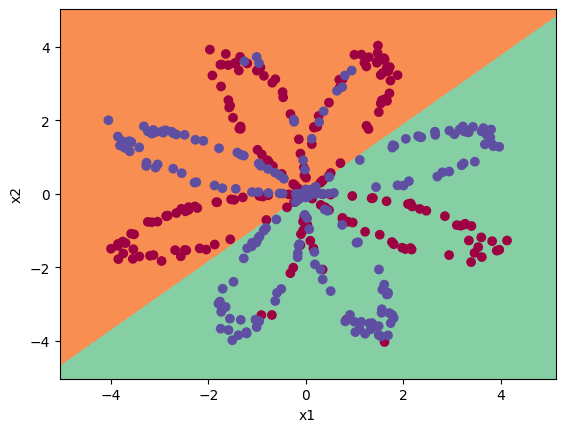

/tmp/ipython-input-4164719099.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)


Accuracy: 67 %
The hidden layer size is: 2


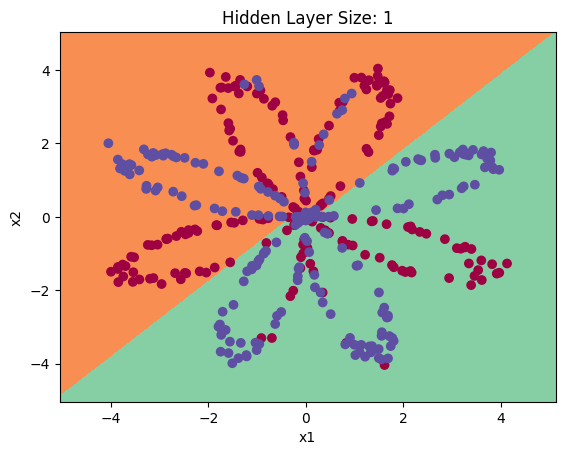

Accuracy: 65 %
The hidden layer size is: 3


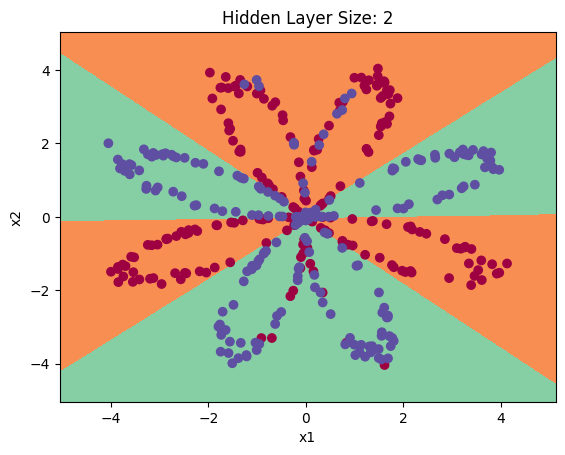

Accuracy: 89 %
The hidden layer size is: 4


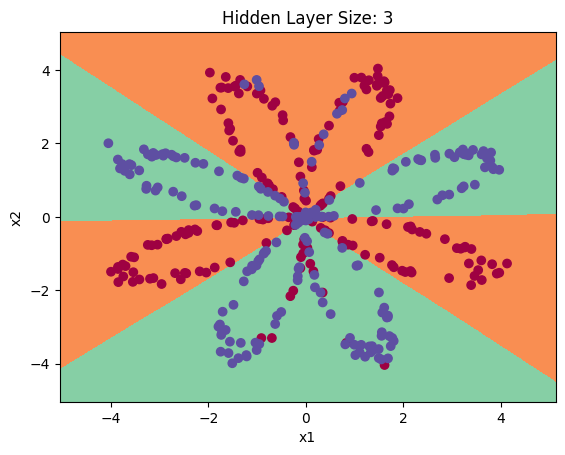

Accuracy: 90 %
The hidden layer size is: 5


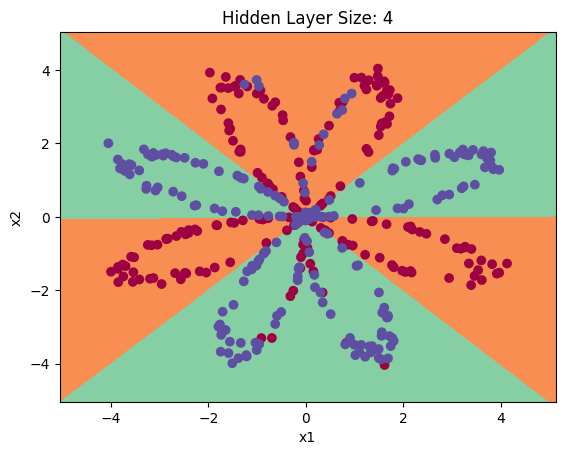

Accuracy: 91 %
The hidden layer size is: 20


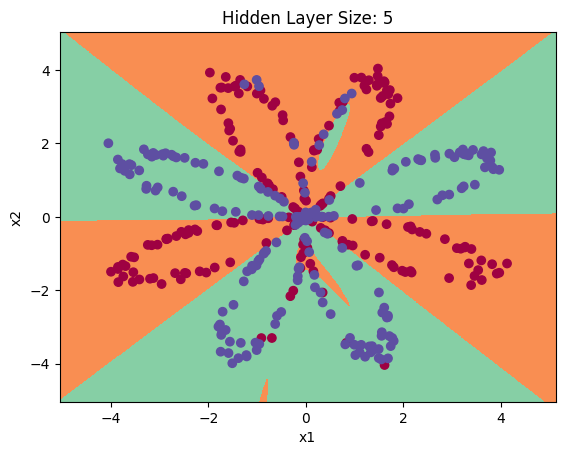

Accuracy: 93 %
The hidden layer size is: 50


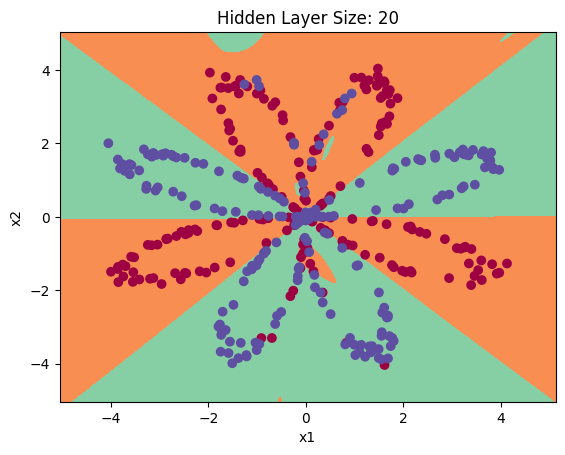

Accuracy: 92 %


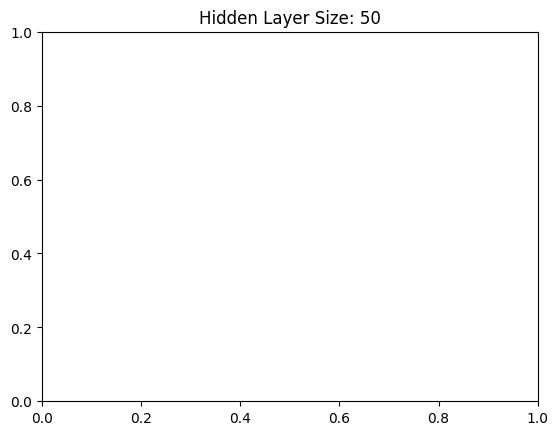

In [ ]:
# Create a list of hidden layer sizes to test
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]

# Loop through each hidden layer size
for n_h in hidden_layer_sizes:
    # Print the current hidden layer size being used
    print ("The hidden layer size is: " + str(n_h))

    # Train a new neural network model with this hidden layer size
    parameters = nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False)

    # Plot the decision boundary to visualize the model's performance
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    plt.title("Hidden Layer Size: " + str(n_h))

    # Make predictions and calculate the accuracy
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ('Accuracy: %d ' % accuracy + '%')